### Exercício 12: Análise de Satisfação de Bancos

In [40]:
import seaborn as sns  
import pandas as pd
import matplotlib as plt
import numpy as np

In [41]:
df = pd.read_excel ("C:\\Users\\FIC\\Documents\\fundamentos-datapython-erika\\Arquivos\\dados-satisfação.xlsx", sheet_name = 'treino')
#sheet name = ler a aba do excel

# Substituindo os dados
df['Elogio a Instituição']= df['Elogio a Instituição'].replace('SIM',1)
df['Elogio a Instituição']= df['Elogio a Instituição'].replace('NÃO',0)
df['Elogio quanto ao app']= df['Elogio quanto ao app'].replace('SIM',1)
df['Elogio quanto ao app']= df['Elogio quanto ao app'].replace('NÃO',0)
df['Elogio quanto ao app']= df['Elogio quanto ao app'].replace('NAO',0)
df['Reclamação quanto ao app']= df['Reclamação quanto ao app'].replace('SIM',1)
df['Reclamação quanto ao app']= df['Reclamação quanto ao app'].replace('NÃO',0)
df['Reclamação a Instituição']= df['Reclamação a Instituição'].replace('SIM',1)
df['Reclamação a Instituição']= df['Reclamação a Instituição'].replace('NÃO',0)
df['Não Classificável']= df['Não Classificável'].replace('SIM',1)
df['Não Classificável']= df['Não Classificável'].replace('NÃO',0)

df.info()







<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Instituição               8702 non-null   object        
 1   Comentario                8698 non-null   object        
 2   Data                      8702 non-null   datetime64[ns]
 3   Classificação             8702 non-null   int64         
 4   Elogio quanto ao app      8702 non-null   int64         
 5   Reclamação quanto ao app  8702 non-null   int64         
 6   Elogio a Instituição      8702 non-null   int64         
 7   Reclamação a Instituição  8702 non-null   int64         
 8   Não Classificável         8702 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 612.0+ KB


In [42]:
df['Classificação']= df['Classificação'].replace(2,-1)
df['Classificação']= df['Classificação'].replace(1,-1)
df['Classificação']= df['Classificação'].replace(5,1)
df['Classificação']= df['Classificação'].replace(4,1)
df['Classificação']= df['Classificação'].replace(3,0)
df.head()


,Instituição,Comentario,Data,Classificação,Elogio quanto ao app,Reclamação quanto ao app,Elogio a Instituição,Reclamação a Instituição,Não Classificável
0,Banco do Brasil,Muito bom ajuda muito,2019-07-21,1,1,0,0,0,0
1,Banco do Brasil,excelente,2019-07-21,1,1,0,0,0,0
2,Banco do Brasil,Bom,2019-07-21,1,1,0,0,0,0
3,Banco do Brasil,aplicativo muito top,2019-07-21,1,1,0,0,0,0
4,Banco do Brasil,Fácil e prático,2019-07-21,1,1,0,0,0,0


In [43]:
## Crie um dataframe chamado df_classificacao, para agrupar os dados por instituição, calculando a média da da coluna Classificação.
#df_classificacao = df.groupby(['Instituição'])['Classificação'].mean()
#df_classificacao.values[]

Instituição
Banco Bradesco             0.682366
Banco Itau                 0.569540
Banco do Brasil            0.781609
Caixa Econômica Federal    0.424138
Nubank                     0.585296
Name: Classificação, dtype: float64

In [56]:
# 6) Multiplique os valores da coluna Classificação por 100
df_classificacao = df.groupby(['Instituição'])['Classificação'].agg('mean').reset_index()
df_classificacao['Classificação'] = df_classificacao ['Classificação']*100

In [46]:
# 7) Carregue a paleta de cores Accent, com o comando sns.set_palette;
sns.set_palette

<function seaborn.rcmod.set_palette(palette, n_colors=None, desat=None, color_codes=False)>

In [47]:
## 8) Carregue o estilo darkgrid, utilizando o comando sns.set_style;
sns.set_style

<function seaborn.rcmod.set_style(style=None, rc=None)>

<Axes: xlabel='Instituição', ylabel='Classificação'>

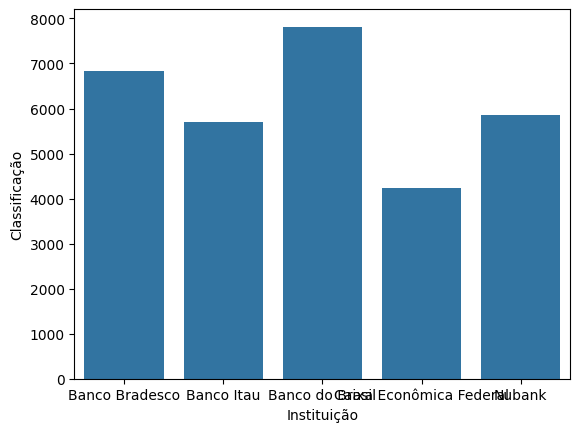

In [61]:
# 9) Gere um gráfico de colunas para apresentar a classificação média por instituição, e escreva um texto com sua análise do NPS
sns.barplot(x= df_classificacao['Instituição'], y=df_classificacao['Classificação'])



<Axes: xlabel='Instituição', ylabel='Elogio quanto ao app'>

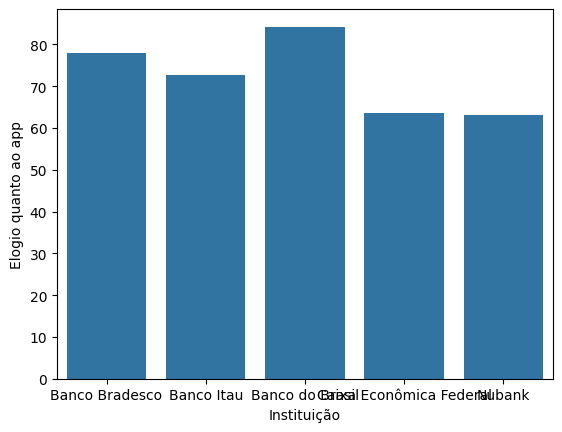

In [72]:
## Análise do % de elogios e reclamações do app para cada instituição
## 10) Repita os passos 5, 6 e 9, considerando a coluna Elogio quanto ao app e Reclamação quanto ao App;

df_elogioapp = df.groupby(['Instituição'])['Elogio quanto ao app'].agg('mean').reset_index()
df_elogioapp ['Elogio quanto ao app'] = df_elogioapp ['Elogio quanto ao app']*100

sns.barplot(x= df_elogioapp['Instituição'], y=df_elogioapp['Elogio quanto ao app'])

<Axes: xlabel='Instituição', ylabel='Reclamação quanto ao app'>

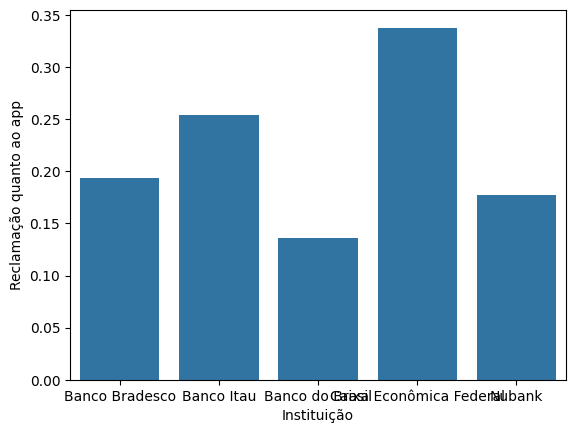

In [74]:
df_reclamaapp = df.groupby(['Instituição'])['Reclamação quanto ao app'].agg('mean').reset_index()
df_reclamaapp ['Elogio quanto ao app'] = df_reclamaapp ['Reclamação quanto ao app']*100
sns.barplot(x= df_reclamaapp['Instituição'], y=df_reclamaapp['Reclamação quanto ao app'])

<Axes: xlabel='Instituição', ylabel='Reclamação a Instituição'>

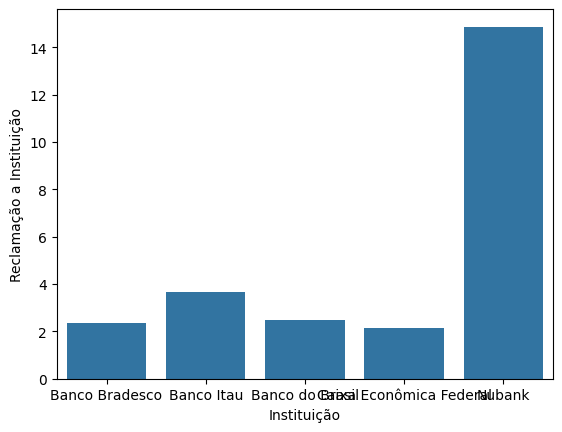

In [78]:
## 11) Repita os passos 5, 6 e 9, considerando a coluna Elogio quanto a instituição e Reclamação quanto a instituição
df_reclama = df.groupby(['Instituição'])['Reclamação a Instituição'].agg('mean').reset_index()
df_reclama ['Reclamação a Instituição'] = df_reclama ['Reclamação a Instituição']*100
sns.barplot(x= df_reclama['Instituição'], y=df_reclama['Reclamação a Instituição'])

<Axes: xlabel='Instituição', ylabel='Elogio a Instituição'>

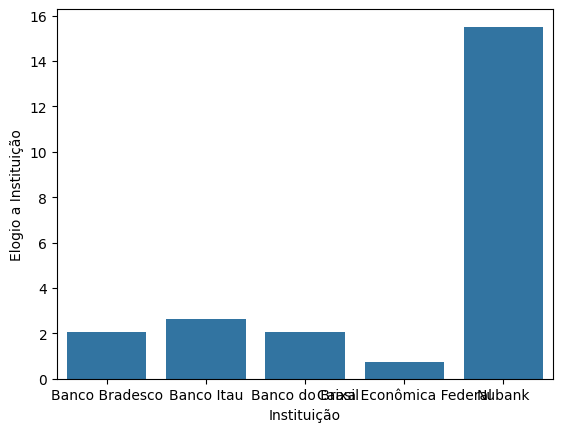

In [80]:
df_elogio = df.groupby(['Instituição'])['Elogio a Instituição'].agg('mean').reset_index()
df_elogio ['Elogio a Instituição'] = df_elogio ['Elogio a Instituição']*100
sns.barplot(x= df_elogio['Instituição'], y=df_elogio['Elogio a Instituição'])

In [81]:
## 12) Crie um gráfico de linhas utilizando a biblioteca Seaborn, para demonstrar a evolução da classificação por instituição.
